## importing libraries

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Load DataSet

In [16]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

## cleaning 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
# % of null values in each column
round((df.isnull().sum()/len(df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [19]:
# Alley','PoolQC','MiscFeature','Fence' , have large null values and can de removed from dataset.
df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace = True)
df.shape

(1460, 77)

In [20]:
df.drop(['Id'],axis=1, inplace=True)


In [21]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [22]:
# changing dtype of yr sold to object.
df['YrSold'] = df['YrSold'].astype('object')

C:\Users\Dilliy\AppData\Local\Temp\ipykernel_12604\4287306054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


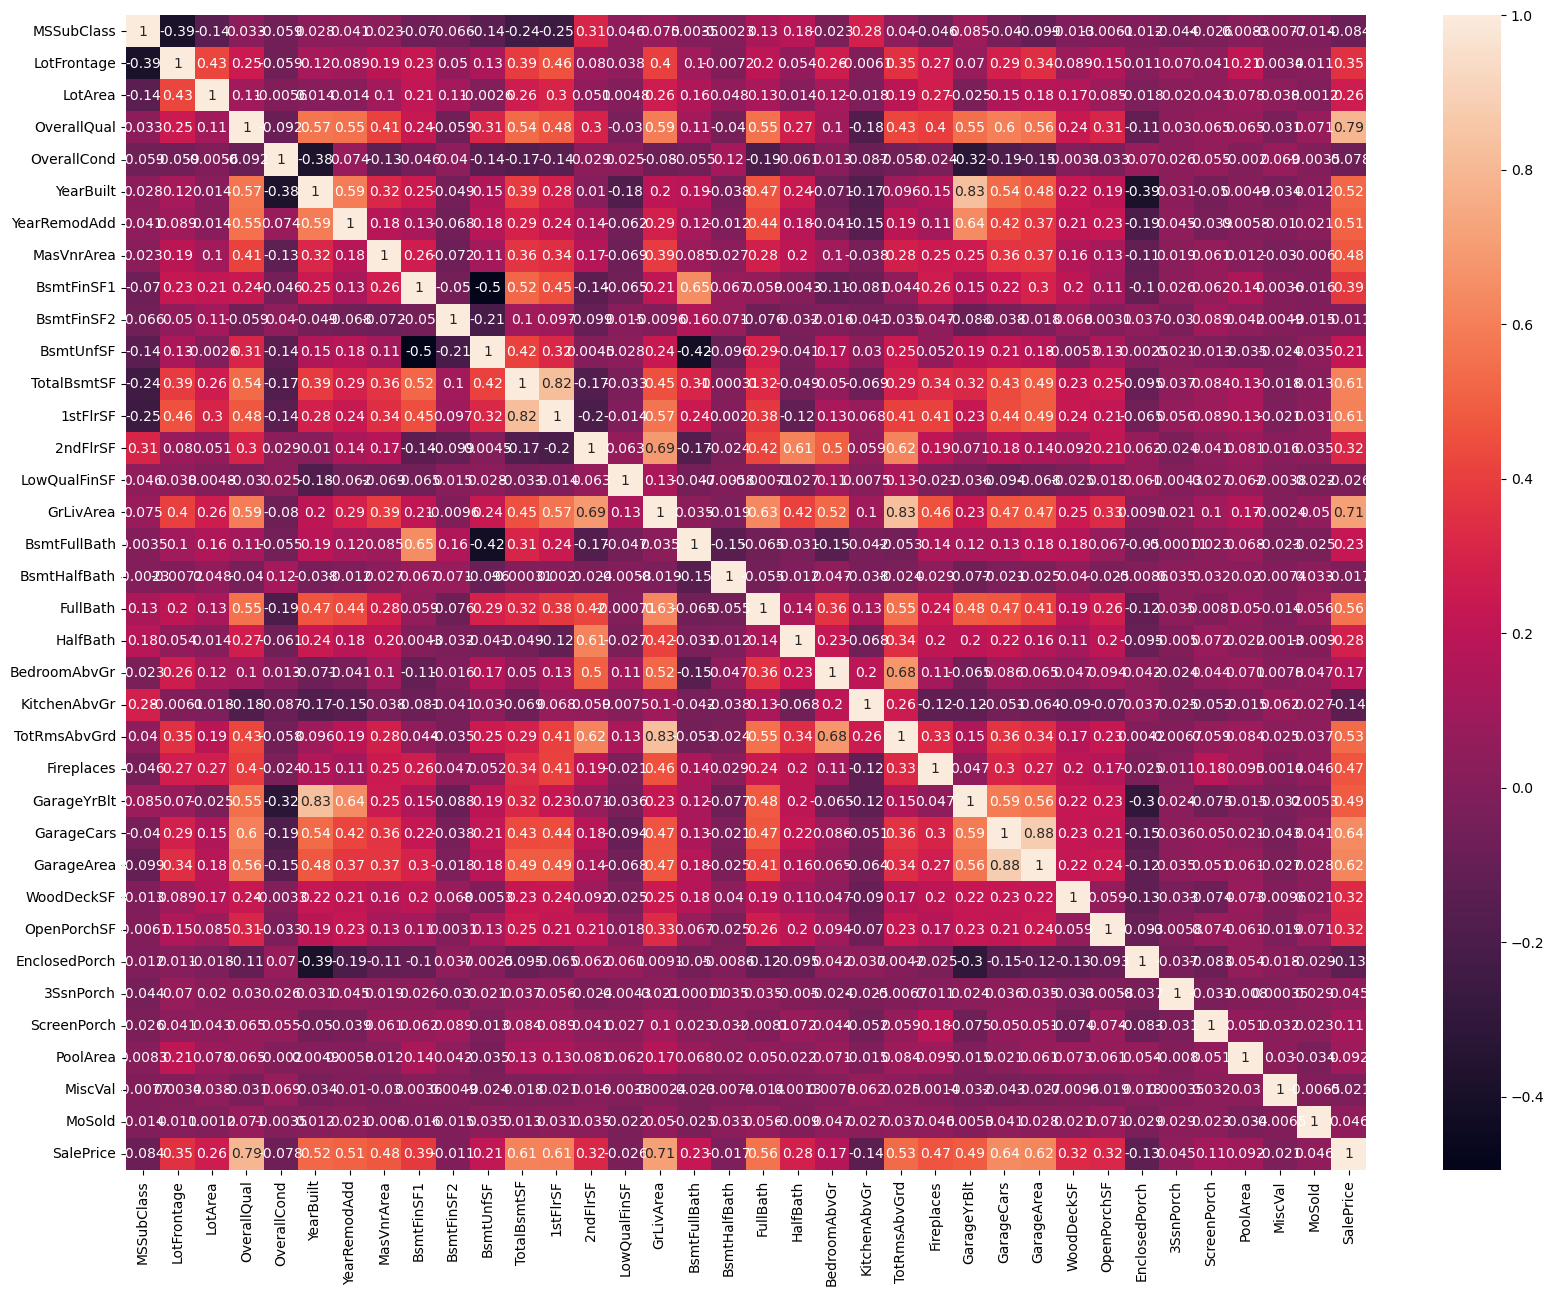

In [23]:
plt.figure(figsize = (20, 15))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# 

In [24]:
# deriving numerical columns.
df_num = df.select_dtypes(['int64','float64'])
df_num.shape

(1460, 36)

In [25]:
# deriving categorical columns
df_cat = df.select_dtypes(['object'])
df_cat.shape

(1460, 40)

## EDA

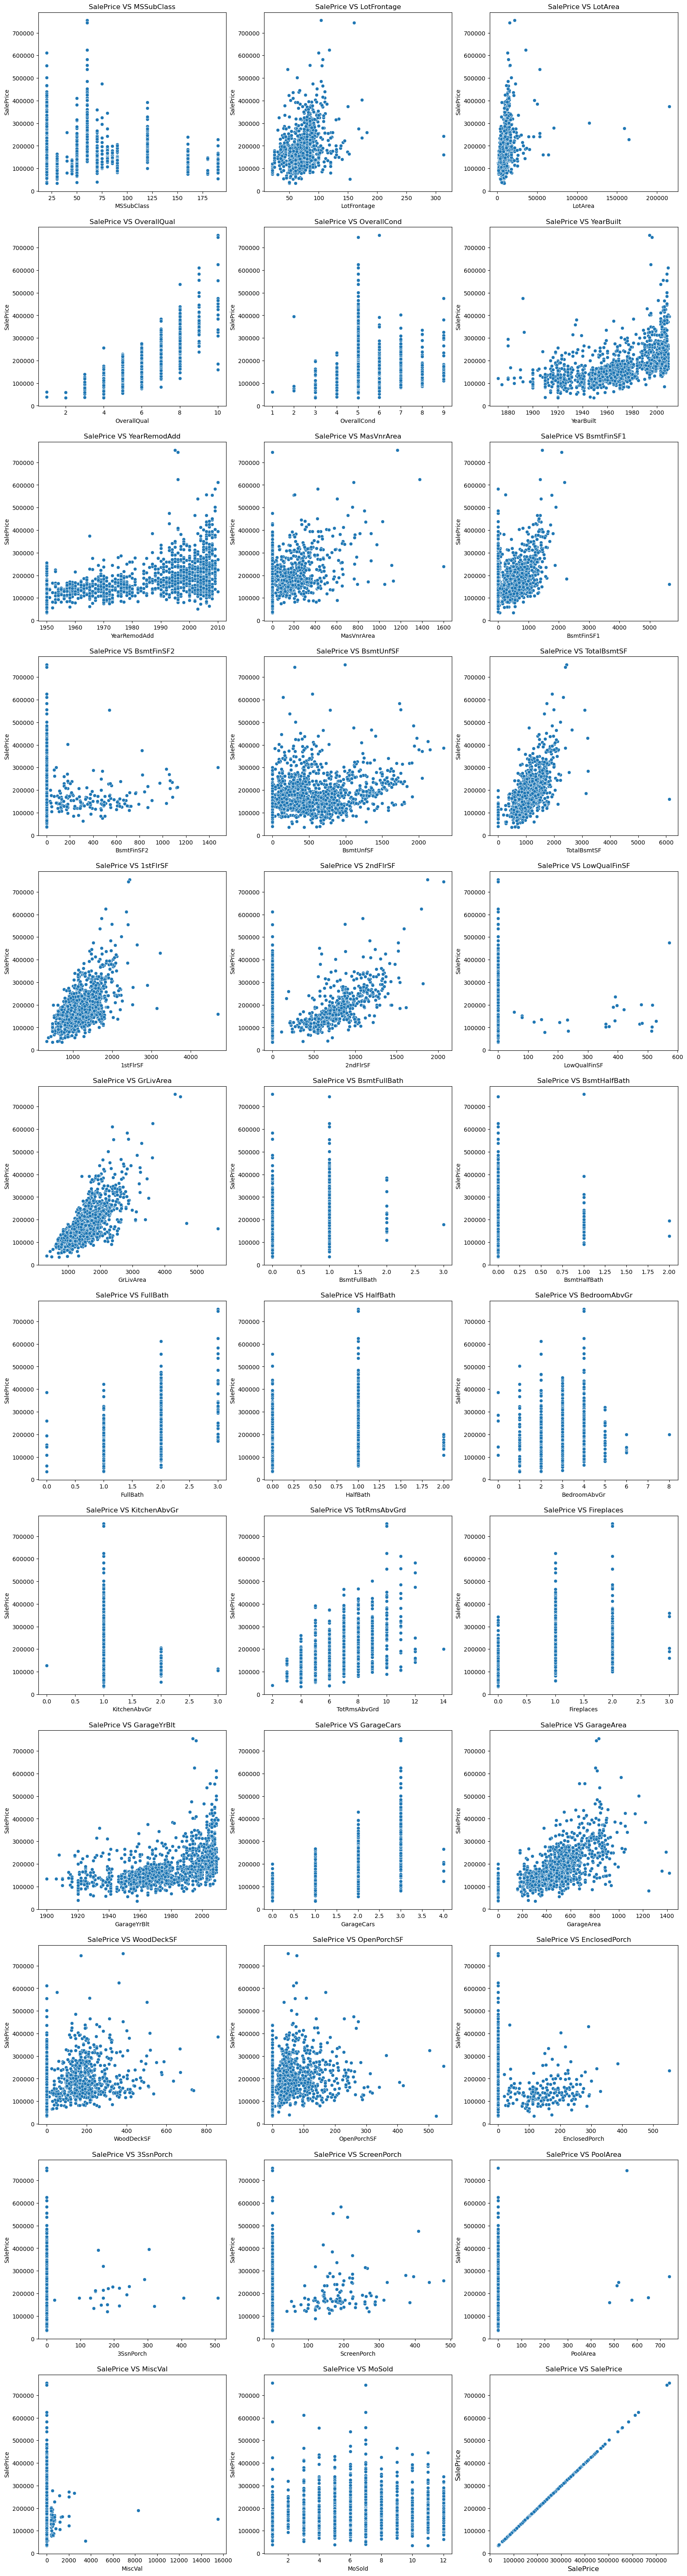

In [26]:
#Visualising numerical vs  Target Variables
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice',data=df_num,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

In [27]:
def plot_categorical(lst):
    plt.figure(figsize=(20,50))
    cols = 3
    rows = len(lst)//3 + 1
    for i in range(1,len(lst)):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=lst[i-1], y='SalePrice', data=df)
    plt.show()

In [28]:
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [29]:
#converting year to number of years
df['YearBuilt'] = 2019 - df['YearBuilt']
df['YearRemodAdd'] = 2019 - df['YearRemodAdd']
df['GarageYrBlt'] = 2019 - df['GarageYrBlt']
df['YrSold'] = 2019 - df['YrSold']

In [30]:
#

In [31]:
#converting from int type to object to treat the variables as categorical variables
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [32]:
# Find out the remaining columns with null values 
null_cols = round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending=False)
null_cols = null_cols[null_cols > 0]
null_cols


FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [33]:
# filling objects with null and numerics to 0 
for col in null_cols.index:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('none')
    else:
        df[col] = df[col].fillna(0)

In [34]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

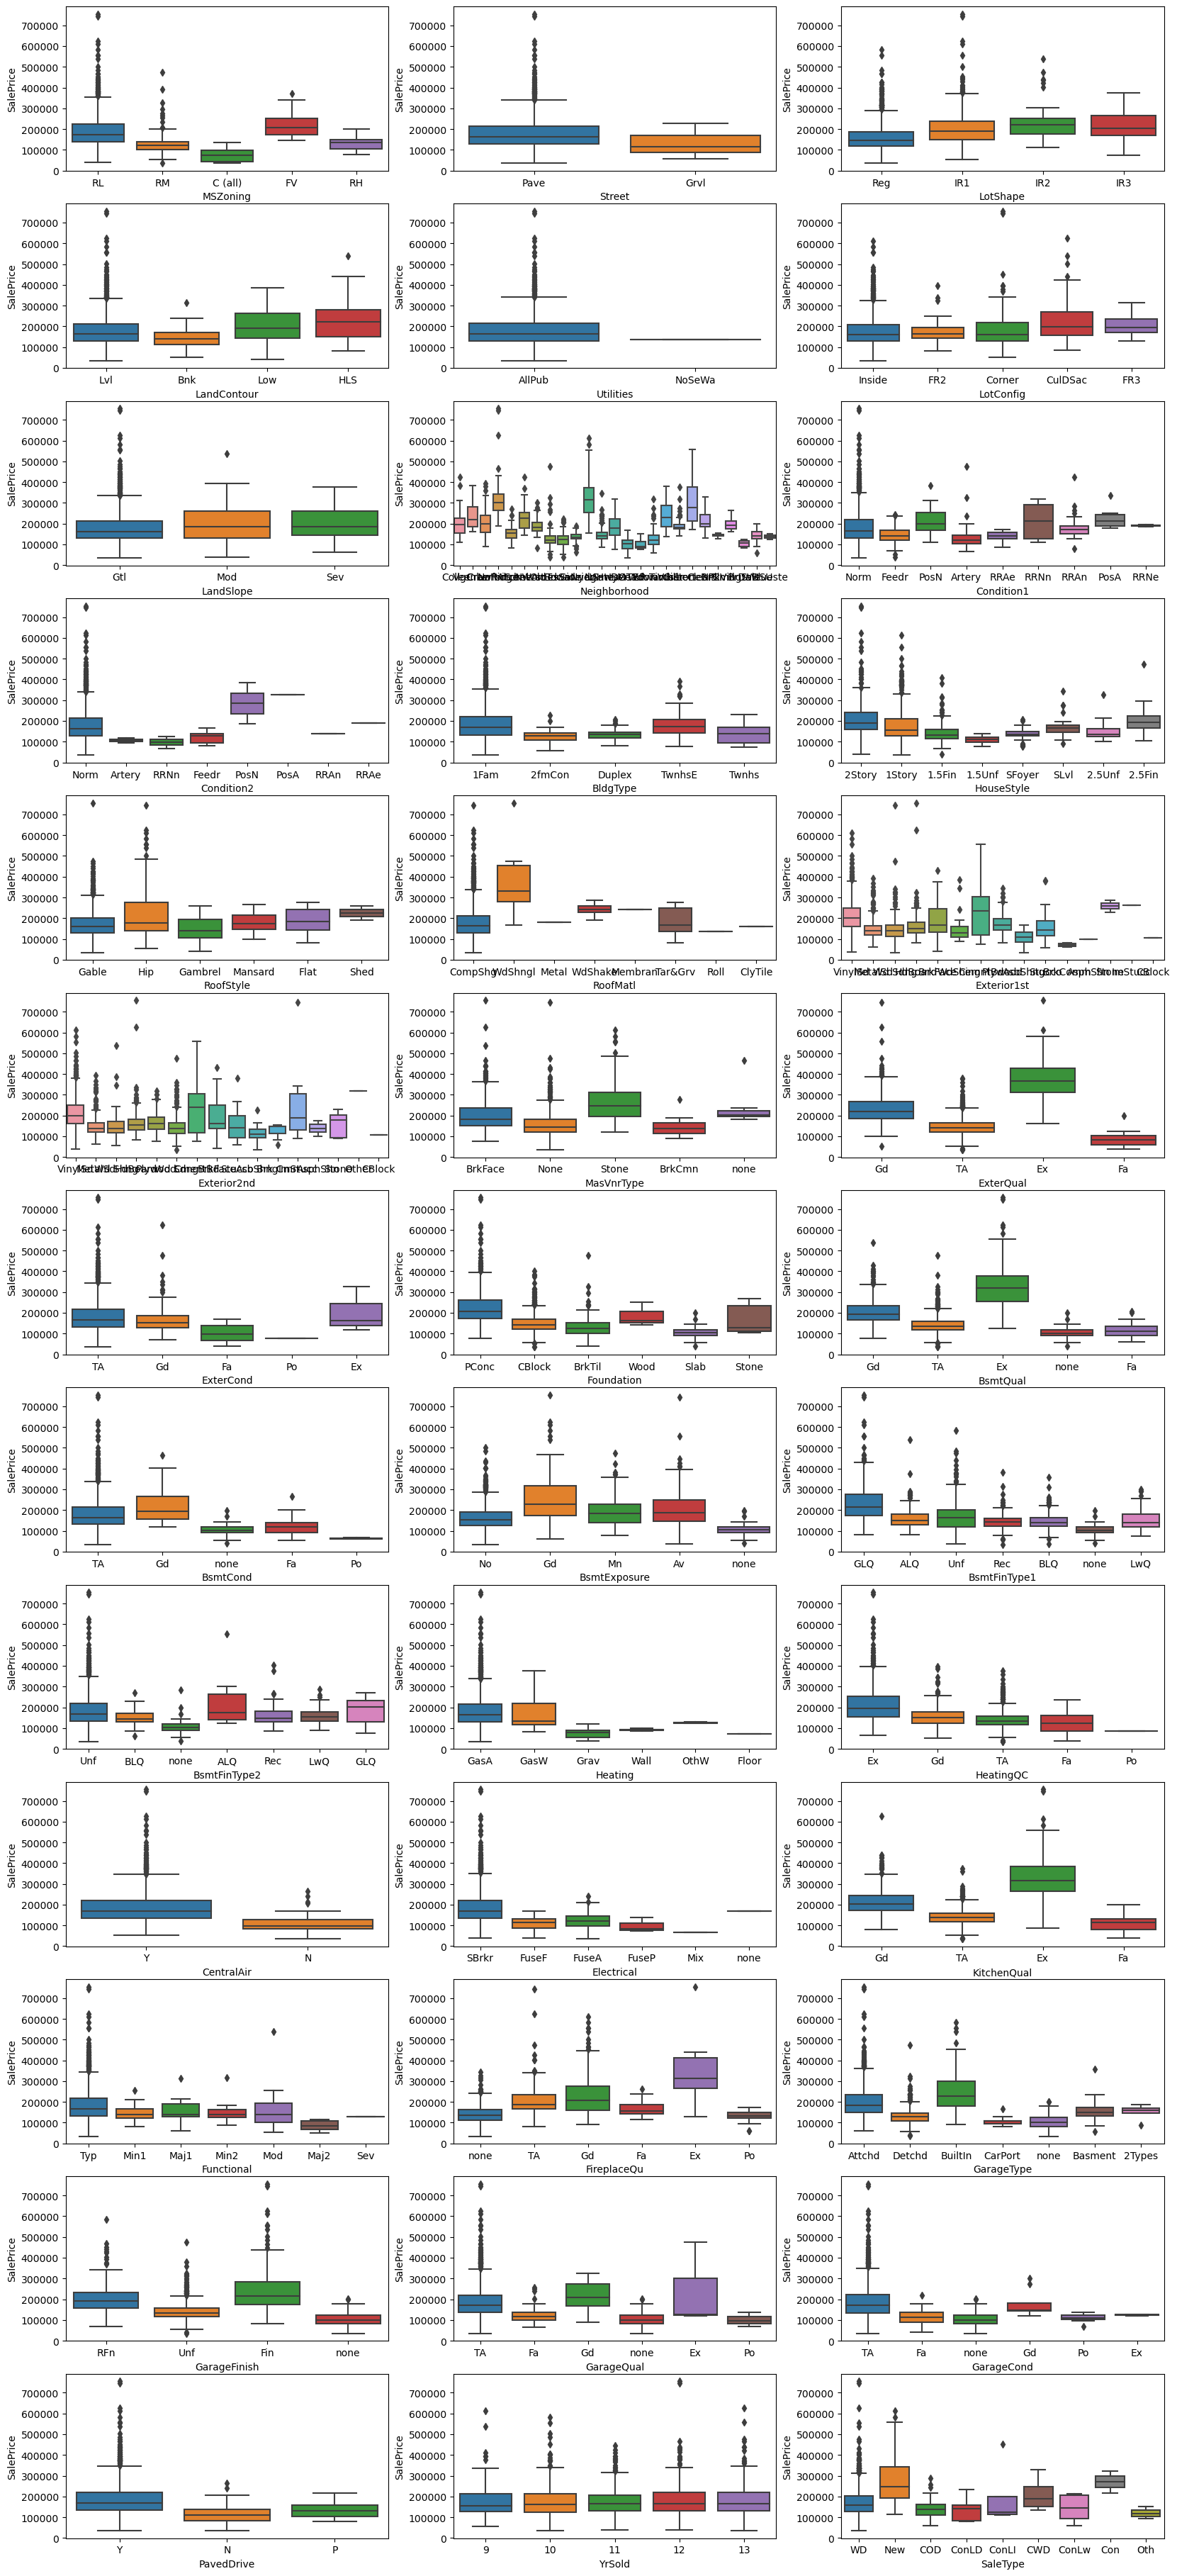

In [35]:
plot_categorical(df_cat.columns)

In [36]:
df.shape

(1460, 76)

In [37]:
df_dum = pd.get_dummies(df_cat,drop_first=True)
df_dum.head()

C:\Users\Dilliy\AppData\Local\Temp\ipykernel_12604\1397785946.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dum = pd.get_dummies(df_cat,drop_first=True)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [38]:
df = df.drop(list(df_cat.columns),axis =1)
df.shape

(1460, 36)

In [39]:
# concat dummy variables with X
df = pd.concat([df, df_dum], axis=1)

In [40]:
X=df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])

In [41]:
#Get the revised list of numerical and categorical variables as we have done soome transformations and created new cols
numcols = X.select_dtypes(include=['float64','int64']).columns.tolist()
catcols = X.select_dtypes(include='object').columns.tolist()

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=50)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = X.columns
# scaling the numeric columns as we have created dummies for categorical variables
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_test[numcols] = scaler.transform(X_test[numcols])

In [69]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
folds = 5
model = GridSearchCV(estimator = ridge,
                     param_grid = params,
                     scoring ='neg_mean_squared_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [70]:
#checking the value of optimum number of parameters
print(model.best_params_)
print(model.best_score_)


{'alpha': 20}
-0.021769209789396993


In [71]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027992,0.006811,0.008915,0.003062,0.0001,{'alpha': 0.0001},-0.065698,-0.013859,-0.049752,-0.060311,-0.046878,-0.047300,0.018068,28,-0.007109,-0.008074,-0.008179,-0.007065,-0.007691,-0.007624,0.000467
1,0.026762,0.008960,0.009589,0.005703,0.001,{'alpha': 0.001},-0.064216,-0.013893,-0.048739,-0.060242,-0.045992,-0.046616,0.017726,27,-0.007110,-0.008075,-0.008180,-0.007065,-0.007691,-0.007624,0.000468
2,0.023246,0.002991,0.007718,0.002598,0.01,{'alpha': 0.01},-0.052896,-0.014262,-0.040828,-0.059593,-0.039306,-0.041377,0.015520,26,-0.007177,-0.008147,-0.008232,-0.007066,-0.007753,-0.007675,0.000481
3,0.023476,0.001715,0.006020,0.001161,0.05,{'alpha': 0.05},-0.034093,-0.015543,-0.026818,-0.057277,-0.028276,-0.032401,0.013813,25,-0.007733,-0.008681,-0.008684,-0.007087,-0.008237,-0.008085,0.000610
4,0.023132,0.004979,0.009035,0.002762,0.1,{'alpha': 0.1},-0.028113,-0.016273,-0.022059,-0.055134,-0.024493,-0.029214,0.013520,24,-0.008249,-0.009125,-0.009120,-0.007133,-0.008676,-0.008461,0.000739
5,0.024150,0.005866,0.006539,0.002950,0.2,{'alpha': 0.2},-0.024866,-0.016753,-0.019389,-0.052140,-0.022016,-0.027033,0.012840,23,-0.008830,-0.009601,-0.009617,-0.007252,-0.009185,-0.008897,0.000873
6,0.021148,0.002482,0.007708,0.002047,0.3,{'alpha': 0.3},-0.023873,-0.016855,-0.018535,-0.050092,-0.021014,-0.026074,0.012241,21,-0.009163,-0.009879,-0.009906,-0.007383,-0.009494,-0.009165,0.000932
7,0.023245,0.002626,0.010453,0.003234,0.4,{'alpha': 0.4},-0.023424,-0.016850,-0.018119,-0.048582,-0.020447,-0.025484,0.011764,20,-0.009393,-0.010080,-0.010108,-0.007513,-0.009719,-0.009363,0.000961
8,0.026945,0.007112,0.008885,0.002101,0.5,{'alpha': 0.5},-0.023175,-0.016809,-0.017864,-0.047415,-0.020076,-0.025068,0.011384,19,-0.009569,-0.010241,-0.010266,-0.007638,-0.009896,-0.009522,0.000976
9,0.029551,0.004775,0.009057,0.001337,0.6,{'alpha': 0.6},-0.023019,-0.016755,-0.017687,-0.046480,-0.019814,-0.024751,0.011076,18,-0.009711,-0.010379,-0.010396,-0.007755,-0.010043,-0.009657,0.000983


In [72]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [73]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9005964036406708
0.9009092792340212


In [74]:
# ridge model parameters
model_parameters = list(ridge.coef_)
#model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.07, 'OverallQual'),
 (0.052, 'Neighborhood_Crawfor'),
 (0.049, 'GarageCars'),
 (0.047, 'GrLivArea'),
 (-0.047, 'Neighborhood_Edwards'),
 (0.045, 'Condition1_Norm'),
 (-0.042, 'YearBuilt'),
 (0.041, 'OverallCond'),
 (0.039, 'Neighborhood_NridgHt'),
 (0.037, 'FullBath'),
 (0.037, 'CentralAir_Y'),
 (0.035, 'Exterior1st_BrkFace'),
 (0.034, '2ndFlrSF'),
 (0.033, 'Neighborhood_StoneBr'),
 (0.033, 'Functional_Typ'),
 (0.033, 'SaleCondition_Normal'),
 (-0.031, 'BsmtFinType1_Unf'),
 (0.03, 'Fireplaces'),
 (0.029, 'BsmtFullBath'),
 (0.029, 'MSZoning_RL'),
 (-0.028, 'Neighborhood_IDOTRR'),
 (0.028, 'Foundation_PConc'),
 (-0.027, 'MSZoning_RM'),
 (0.027, 'LandSlope_Mod'),
 (-0.026, 'YearRemodAdd'),
 (0.026, '1stFlrSF'),
 (0.026, 'LotConfig_CulDSac'),
 (0.026, 'BsmtExposure_Gd'),
 (0.025, 'MSZoning_FV'),
 (-0.025, 'BldgType_Twnhs'),
 (-0.025, 'KitchenQual_Gd'),
 (0.024, 'Neighborhood_Somerst'),
 (0.024, 'SaleType_New'),
 (0.023, 'Condition2_Norm'),
 (0.023, 'BsmtCond_TA'),
 (-0.023, 'KitchenQua

In [75]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\Dilliy\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.262e-02, tolerance: 1.401e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 0.001}
-0.09123942909508564


In [77]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [78]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8982613829352001
0.9030651456275124


In [79]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
#lasso_selected_features = []
#for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
#    lasso_selected_features.append(v)
lasso_params = sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)
lasso_params



[(0.098, 'GrLivArea'),
 (0.098, 'Neighborhood_Crawfor'),
 (0.08, 'Neighborhood_NridgHt'),
 (0.079, 'Neighborhood_StoneBr'),
 (0.072, 'OverallQual'),
 (0.066, 'GarageCars'),
 (0.059, 'Condition1_Norm'),
 (0.058, 'SaleType_New'),
 (-0.056, 'YearBuilt'),
 (-0.056, 'Neighborhood_Edwards'),
 (0.055, 'Exterior1st_BrkFace'),
 (0.053, 'Neighborhood_Somerst'),
 (0.051, 'CentralAir_Y'),
 (0.043, 'OverallCond'),
 (-0.042, 'BldgType_Twnhs'),
 (0.042, 'Functional_Typ'),
 (-0.039, 'BsmtFinType1_Unf'),
 (0.039, 'SaleCondition_Normal'),
 (0.038, 'BsmtExposure_Gd'),
 (0.037, 'LotConfig_CulDSac'),
 (0.033, 'FullBath'),
 (0.031, 'BsmtFullBath'),
 (0.031, 'Fireplaces'),
 (-0.029, 'MSZoning_RM'),
 (0.028, 'MSZoning_RL'),
 (0.028, 'Neighborhood_NoRidge'),
 (0.027, 'Foundation_PConc'),
 (-0.025, 'Neighborhood_IDOTRR'),
 (-0.024, 'YearRemodAdd'),
 (0.024, 'LandSlope_Mod'),
 (-0.023, 'Foundation_Slab'),
 (0.022, 'ExterCond_TA'),
 (-0.022, 'KitchenQual_Gd'),
 (0.019, 'Exterior1st_MetalSd'),
 (-0.018, 'HouseStyl

In [80]:
top5 = [x for beta, x in lasso_params[1:6]]
top5

['Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'OverallQual',
 'GarageCars']

In [81]:
#doubling ridge
alpha = 100
ridge_1 = Ridge(alpha=alpha,random_state = 42)

ridge_1.fit(X_train, y_train)

Ridge(alpha=100, random_state=42)

In [82]:
y_train_pred = ridge_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8922932965620715
0.8986670579723907


In [83]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge_1.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             0.072398
GarageCars              0.043039
GrLivArea               0.042976
YearBuilt              -0.040634
OverallCond             0.039261
Condition1_Norm         0.036494
Neighborhood_Crawfor    0.034462
Neighborhood_Edwards   -0.032454
FullBath                0.031004
Fireplaces              0.030687
dtype: float64

In [84]:
# double lasso
alpha = 0.002
lasso_1 = Lasso(alpha=alpha,random_state = 42)

lasso_1.fit(X_train, y_train)



Lasso(alpha=0.002, random_state=42)

In [85]:
y_train_pred = lasso_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8845313992037311
0.8961283141077069


In [86]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso_1.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               0.099013
OverallQual             0.083057
Neighborhood_Crawfor    0.069001
GarageCars              0.066603
YearBuilt              -0.058408
MSZoning_RM            -0.057251
Condition1_Norm         0.050784
OverallCond             0.042701
Neighborhood_Edwards   -0.041901
Neighborhood_NridgHt    0.036433
dtype: float64

In [87]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [88]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1168, 211), (292, 211))

In [89]:
# Building Lasso model with these features
lasso3= Lasso(alpha= 0.002)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.002)

In [90]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

CentralAir_Y      0.097646
2ndFlrSF          0.095752
Functional_Typ    0.089956
GarageCars        0.088645
1stFlrSF          0.079275
dtype: float64

In [91]:
y_train_pred = lasso3.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso3.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8553128091344547
0.8591334553805214
